In [4]:
from pyvista import examples
import pyvista 
# "ipyvtklink", "panel", "ipygany", "static", "pythreejs", "client", "server", "trame", "none"
pyvista.start_xvfb()

pyvista.set_jupyter_backend('static')
mesh = examples.download_st_helens()
warped = mesh.warp_by_scalar('Elevation')
surf = warped.extract_surface().triangulate()
surf = surf.decimate_pro(0.75)  # reduce the density of the mesh by 75%
surf.plot(cmap='Purples')

/tmp/ipykernel_87/2256983130.py:6: PyVistaDeprecationWarning: `pythreejs` backend is deprecated and is planned for future removal.
  pyvista.set_jupyter_backend('pythreejs')


Renderer(camera=PerspectiveCamera(aspect=1.3333333333333333, children=(DirectionalLight(intensity=0.25, positi…

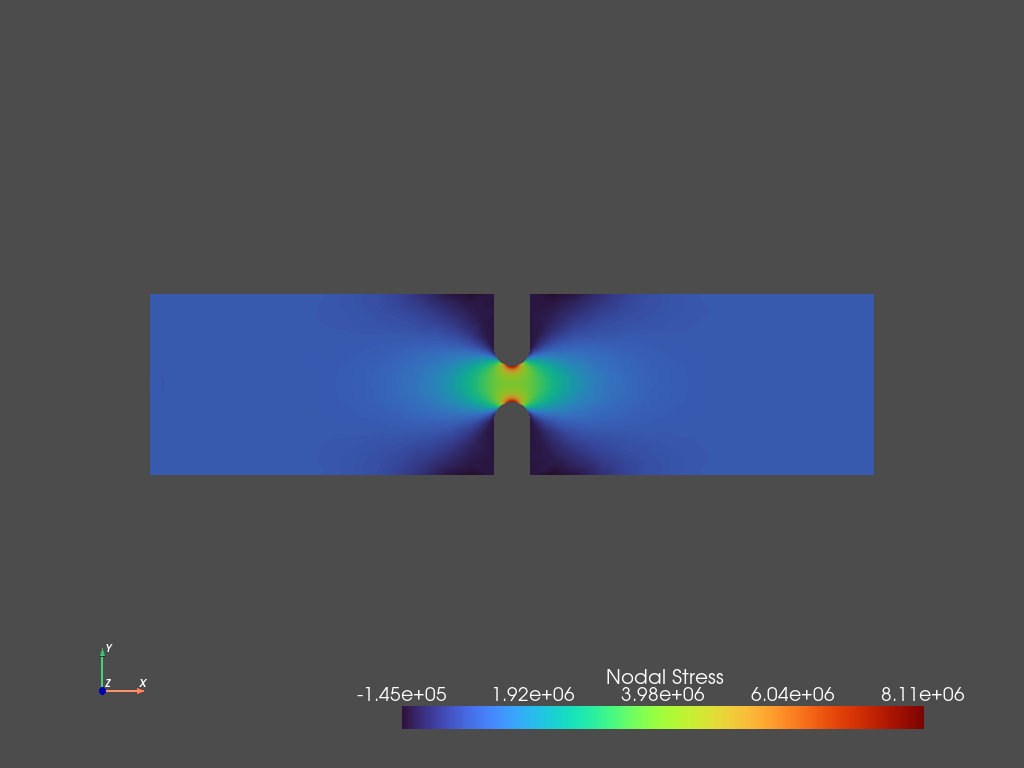

In [3]:
mesh = examples.download_notch_stress()
mesh.plot(scalars='Nodal Stress', component=0, cmap='turbo', cpos='xy')

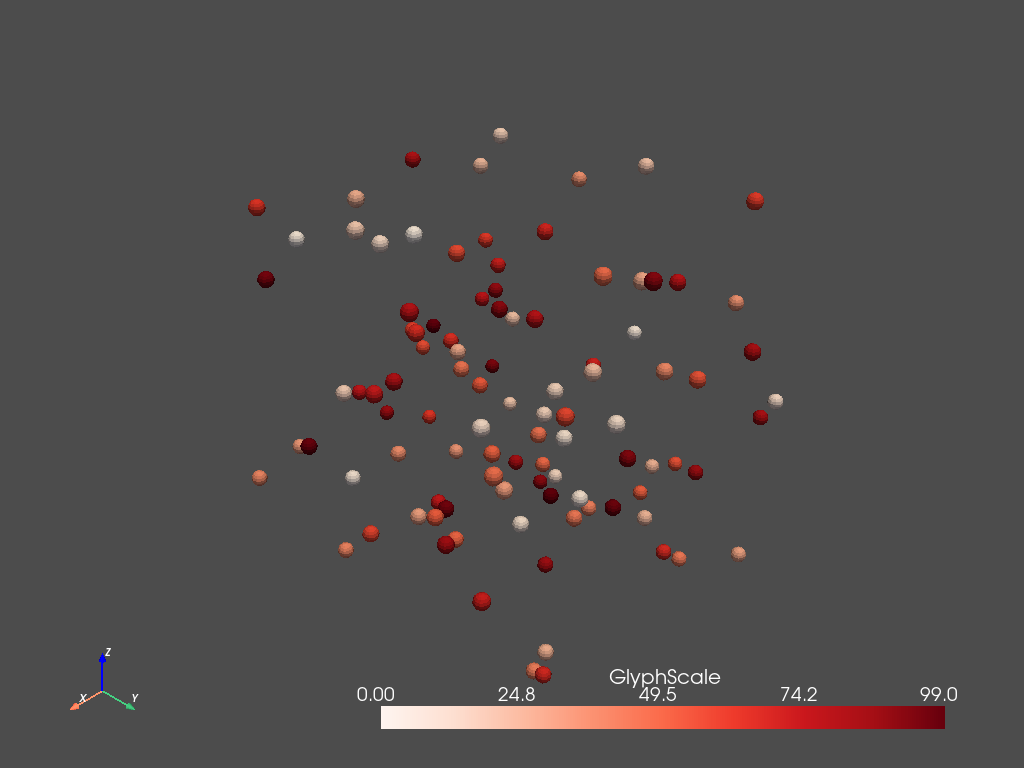

In [4]:
import numpy as np
import pyvista

point_cloud = np.random.random((100, 3))
pdata = pyvista.PolyData(point_cloud)
pdata['orig_sphere'] = np.arange(100)

# create many spheres from the point cloud
sphere = pyvista.Sphere(radius=0.02, phi_resolution=10, theta_resolution=10)
pc = pdata.glyph(scale=False, geom=sphere, orient=False)
pc.plot(cmap='Reds')

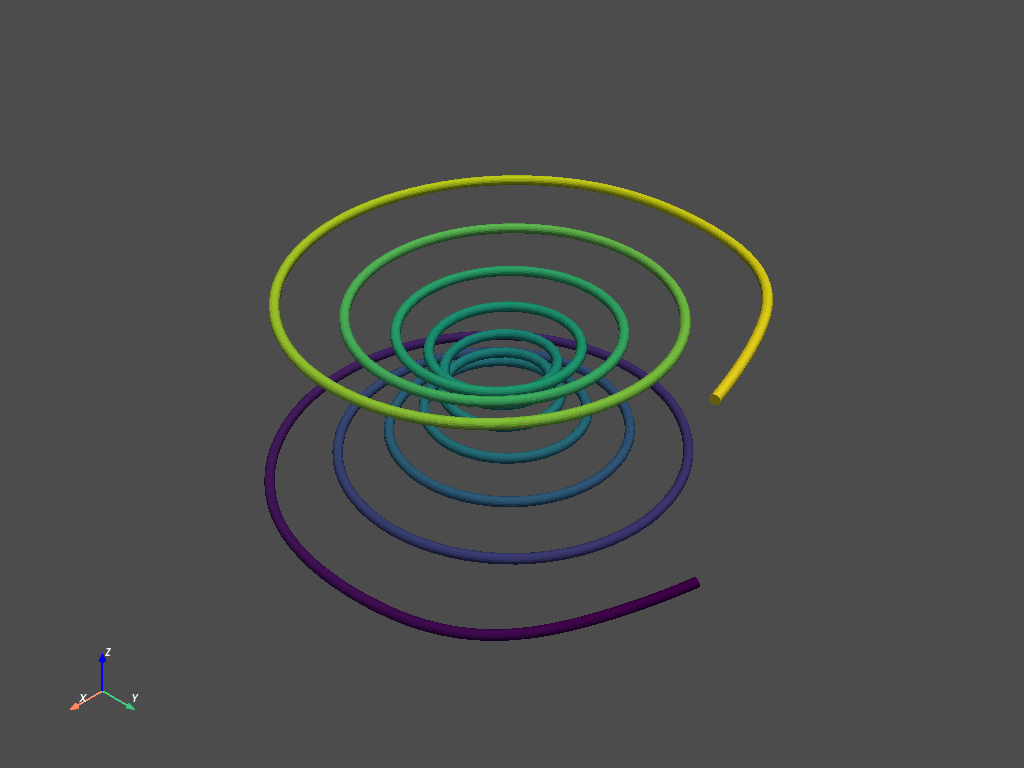

In [5]:
import numpy as np
import pyvista

# Make the xyz points
theta = np.linspace(-10 * np.pi, 10 * np.pi, 100)
z = np.linspace(-2, 2, 100)
r = z**2 + 1
x = r * np.sin(theta)
y = r * np.cos(theta)
points = np.column_stack((x, y, z))

spline = pyvista.Spline(points, 500).tube(radius=0.1)
spline.plot(scalars='arc_length', show_scalar_bar=False)

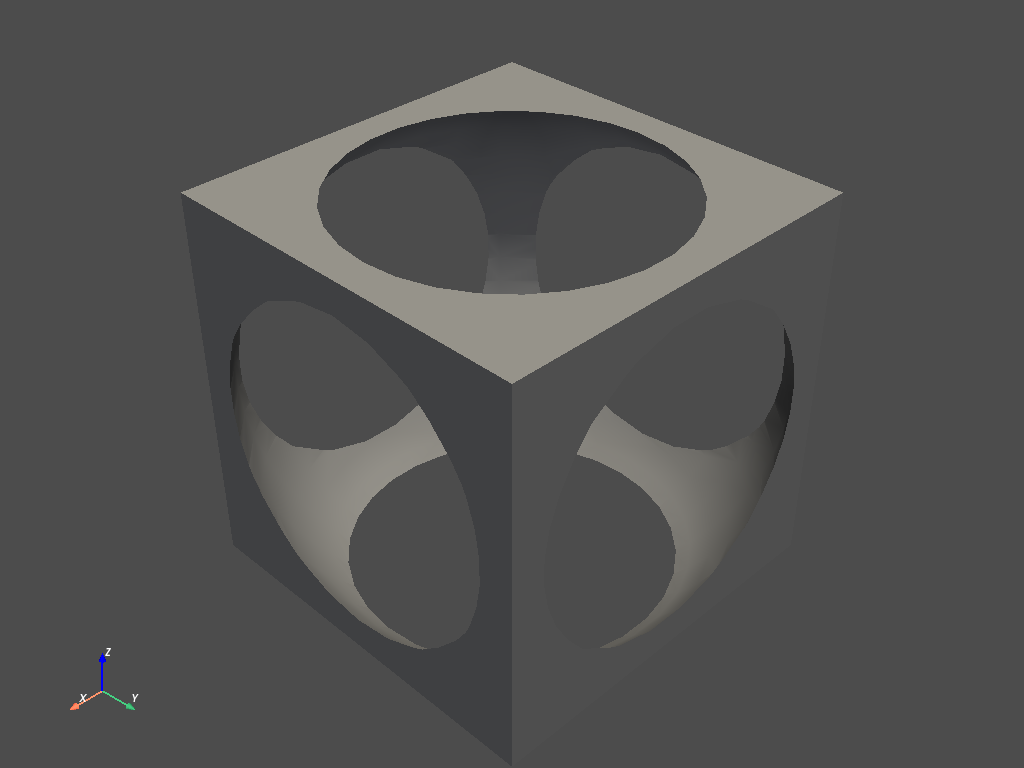

In [6]:
import pyvista
import numpy as np

def make_cube():
    x = np.linspace(-0.5, 0.5, 25)
    grid = pyvista.StructuredGrid(*np.meshgrid(x, x, x))
    surf = grid.extract_surface().triangulate()
    surf.flip_normals()
    return surf

# Create example PolyData meshes for boolean operations
sphere = pyvista.Sphere(radius=0.65, center=(0, 0, 0))
cube = make_cube()

# Perform a boolean difference
boolean = cube.boolean_difference(sphere)
boolean.plot(color='darkgrey', smooth_shading=True, split_sharp_edges=True)